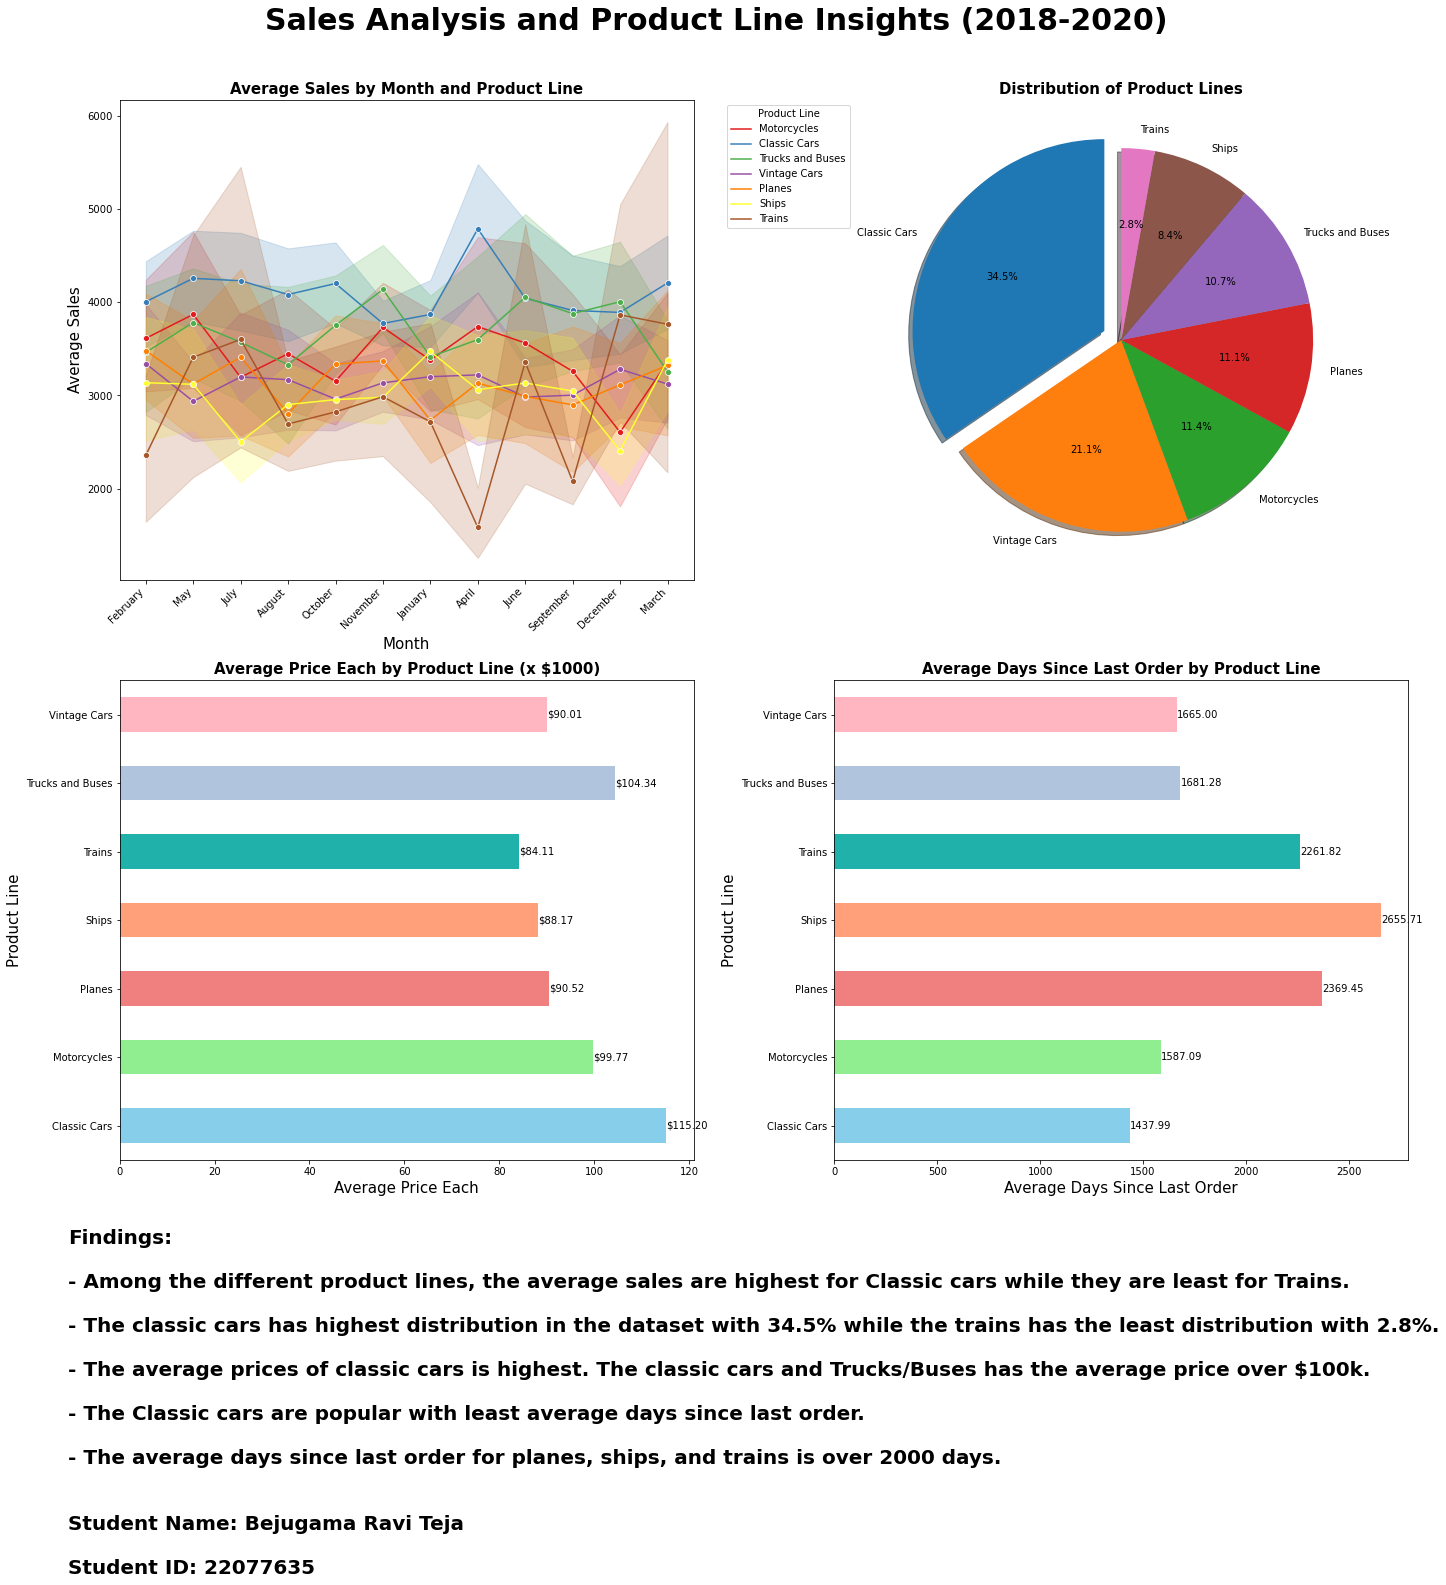

In [4]:
# https://www.kaggle.com/datasets/ddosad/auto-sales-data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Auto Sales data.csv')
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%d/%m/%Y')
df['MONTH'] = df['ORDERDATE'].dt.month
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['MONTH_NAME'] = df['MONTH'].map(month_mapping)
fig = plt.figure(figsize=(20, 17), facecolor='white')
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='MONTH_NAME', y='SALES', hue='PRODUCTLINE', palette='Set1', marker='o')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Average Sales', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.title('Average Sales by Month and Product Line', fontsize=15, color='black', fontweight='bold')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(2, 2, 2)
line_percentage = df['PRODUCTLINE'].value_counts(normalize=True) * 100
explode = (0.1, 0, 0, 0, 0, 0, 0)
plt.pie(line_percentage, labels=line_percentage.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('Distribution of Product Lines', fontsize=15, color='black', fontweight='bold')
plt.subplots_adjust(hspace=0.4)
plt.subplot(2, 2, 3)
average_price_by_line = df.groupby('PRODUCTLINE')['PRICEEACH'].mean()
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'lightsteelblue', 'lightpink', 'lightyellow']
average_price_by_line.plot(kind='barh', color=colors)
for index, value in enumerate(average_price_by_line):
    plt.text(value, index, f'${value:.2f}', ha='left', va='center', fontsize=10, color='black')
plt.xlabel('Average Price Each', fontsize=15)
plt.ylabel('Product Line', fontsize=15)
plt.title('Average Price Each by Product Line (x $1000)', fontsize=15, color='black', fontweight='bold')
plt.subplot(2, 2, 4)
average_days_since_lastorder_by_line = df.groupby('PRODUCTLINE')['DAYS_SINCE_LASTORDER'].mean()
average_days_since_lastorder_by_line.plot(kind='barh', color=colors)
for index, value in enumerate(average_days_since_lastorder_by_line):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')
plt.xlabel('Average Days Since Last Order', fontsize=15)
plt.ylabel('Product Line', fontsize=15)
plt.title('Average Days Since Last Order by Product Line', fontsize=15, color='black', fontweight='bold')
fig.suptitle('Sales Analysis and Product Line Insights (2018-2020)', fontsize=30, color='black', fontweight='bold')
text = """
Findings:

- Among the different product lines, the average sales are highest for Classic cars while they are least for Trains.

- The classic cars has highest distribution in the dataset with 34.5% while the trains has the least distribution with 2.8%.

- The average prices of classic cars is highest. The classic cars and Trucks/Buses has the average price over $100k.

- The Classic cars are popular with least average days since last order.

- The average days since last order for planes, ships, and trains is over 2000 days.


Student Name: Bejugama Ravi Teja

Student ID: 22077635"""
fig.text(0.05, -0.3, text, fontsize=20, va='baseline', fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()